In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch 

In [2]:
# reading the data
data = pd.read_csv('../data/raw/beer_reviews.csv')

In [3]:
# Data preprocessing

data.head()

brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

In [4]:
# Number of rows and columns
data.shape


(1586614, 13)

In [5]:
# printing number of unique values in each column
for i in data.columns:
    print(i, data[i].nunique())

brewery_id 5840
brewery_name 5742
review_time 1577960
review_overall 10
review_aroma 9
review_appearance 10
review_profilename 33387
beer_style 104
review_palate 9
review_taste 9
beer_name 56857
beer_abv 530
beer_beerid 66055


In [6]:
# dropping the unnecessary columns

data.drop(['brewery_id','review_time','review_profilename','beer_beerid'],axis=1,inplace=True)

In [7]:
# Dropping review_overall

data.drop(['review_overall'],axis=1,inplace=True)

In [8]:
# Data Preprocessing

# Normalising all the numerical columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['beer_abv','review_aroma','review_appearance','review_palate','review_taste']] = scaler.fit_transform(data[['beer_abv','review_aroma','review_appearance','review_palate','review_taste']])

data.head()



brewery_name  review_aroma  review_appearance  \
0          Vecchio Birraio         0.250                0.5   
1          Vecchio Birraio         0.375                0.6   
2          Vecchio Birraio         0.375                0.6   
3          Vecchio Birraio         0.500                0.7   
4  Caldera Brewing Company         0.875                0.8   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen          0.125         0.125   
1              English Strong Ale          0.500         0.500   
2          Foreign / Export Stout          0.500         0.500   
3                 German Pilsener          0.375         0.500   
4  American Double / Imperial IPA          0.750         0.875   

                beer_name  beer_abv  
0            Sausa Weizen  0.086497  
1                Red Moon  0.107298  
2  Black Horse Black Beer  0.112498  
3              Sausa Pils  0.086497  
4           Cauldron DIPA  0.133299

In [9]:
# drop brewery_name and beer_name

data.drop(['brewery_name','beer_name'],axis=1,inplace=True)

In [10]:
# Print the number of Nans in each column

data.isnull().sum()


# Removing the rows with Nans

data.dropna(inplace=True)

In [11]:
# Imbalance in the dataset. Applying sampling techniques to balance the dataset

data['beer_style'].value_counts()


beer_style
American IPA                        113164
American Double / Imperial IPA       85124
American Pale Ale (APA)              58081
Russian Imperial Stout               53432
American Double / Imperial Stout     50146
                                     ...  
English Pale Mild Ale                  649
Faro                                   609
Roggenbier                             395
Happoshu                               237
Kvass                                  229
Name: count, Length: 104, dtype: int64

In [12]:
# Import one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Encoding beer_type

one_hot = OneHotEncoder()

one_hot.fit(data[['beer_style']])


# Transforming beer_type

one_hot.transform(data[['beer_style']])

# adding the encoded columns to the dataframe

one_hot_df = pd.DataFrame(one_hot.transform(data[['beer_style']]).toarray(),columns=one_hot.categories_)

one_hot_df.head()

Altbier American Adjunct Lager American Amber / Red Ale  \
0     0.0                    0.0                      0.0   
1     0.0                    0.0                      0.0   
2     0.0                    0.0                      0.0   
3     0.0                    0.0                      0.0   
4     0.0                    0.0                      0.0   

  American Amber / Red Lager American Barleywine American Black Ale  \
0                        0.0                 0.0                0.0   
1                        0.0                 0.0                0.0   
2                        0.0                 0.0                0.0   
3                        0.0                 0.0                0.0   
4                        0.0                 0.0                0.0   

  American Blonde Ale American Brown Ale American Dark Wheat Ale  \
0                 0.0                0.0                     0.0   
1                 0.0                0.0                     0.0   
2                 0.0                0.0                     0.0   
3                 0.0                0.0                     0.0   
4                 0.0                0.0                     0.0   

  American Double / Imperial IPA  ... Scotch Ale / Wee Heavy Scottish Ale  \
0                            0.0  ...                    0.0          0.0   
1                            0.0  ...                    0.0          0.0   
2                            0.0  ...                    0.0          0.0   
3                            0.0  ...                    0.0          0.0   
4                            1.0  ...                    0.0          0.0   

  Scottish Gruit / Ancient Herbed Ale Smoked Beer Tripel Vienna Lager  \
0                                 0.0         0.0    0.0          0.0   
1                                 0.0         0.0    0.0          0.0   
2                                 0.0         0.0    0.0          0.0   
3                                 0.0         0.0    0.0          0.0   
4                                 0.0         0.0    0.0          0.0   

  Weizenbock Wheatwine Winter Warmer Witbier  
0        0.0       0.0           0.0     0.0  
1        0.0       0.0           0.0     0.0  
2        0.0       0.0           0.0     0.0  
3        0.0       0.0           0.0     0.0  
4        0.0       0.0           0.0     0.0  

[5 rows x 104 columns]

In [13]:
one_hot.categories_

[array(['Altbier', 'American Adjunct Lager', 'American Amber / Red Ale',
        'American Amber / Red Lager', 'American Barleywine',
        'American Black Ale', 'American Blonde Ale', 'American Brown Ale',
        'American Dark Wheat Ale', 'American Double / Imperial IPA',
        'American Double / Imperial Pilsner',
        'American Double / Imperial Stout', 'American IPA',
        'American Malt Liquor', 'American Pale Ale (APA)',
        'American Pale Lager', 'American Pale Wheat Ale',
        'American Porter', 'American Stout', 'American Strong Ale',
        'American Wild Ale', 'Baltic Porter', 'Belgian Dark Ale',
        'Belgian IPA', 'Belgian Pale Ale', 'Belgian Strong Dark Ale',
        'Belgian Strong Pale Ale', 'Berliner Weissbier',
        'Bière de Champagne / Bière Brut', 'Bière de Garde', 'Black & Tan',
        'Bock', 'Braggot', 'California Common / Steam Beer', 'Chile Beer',
        'Cream Ale', 'Czech Pilsener', 'Doppelbock',
        'Dortmunder / Export Lager

In [14]:
y = one_hot_df

X = data.drop(['beer_style'],axis=1)

data = pd.concat([X,y],axis=1)

In [15]:
# Splitting the data into train, validation and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

In [16]:
# Printing the shape of train, validation and test

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Printing the shape of train, validation and test

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(911297, 5)
(303766, 5)
(303766, 5)
(911297, 104)
(303766, 104)
(303766, 104)


In [17]:
# Creating a ANN model using Pytorch

import torch.nn as nn

import torch.nn.functional as F

# creating a nueral network in pytorch such that input layer has 5 neurons, 1 hidden layer has 10 neurons and output layer has 104 neurons

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(5,100)
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,104)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        # returning softmax of x
        return F.softmax(x,dim=1)
    


In [18]:
# Convert the data into tensors

X_train_tensor = torch.tensor(X_train.values).float()
X_val_tensor = torch.tensor(X_val.values).float()
X_test_tensor = torch.tensor(X_test.values).float()

y_train_tensor = torch.tensor(y_train.values).float()
y_val_tensor = torch.tensor(y_val.values).float()
y_test_tensor = torch.tensor(y_test.values).float()



In [19]:
# Printing the shape of train, validation and test

print(X_train_tensor.shape)
print(X_val_tensor.shape)
print(X_test_tensor.shape)

# Printing the shape of train, validation and test

print(y_train_tensor.shape)
print(y_val_tensor.shape)
print(y_test_tensor.shape)


torch.Size([911297, 5])
torch.Size([303766, 5])
torch.Size([303766, 5])
torch.Size([911297, 104])
torch.Size([303766, 104])
torch.Size([303766, 104])


In [20]:
# Initializing the model parameters

model = Net()

# Defining the loss function

loss_function = nn.BCEWithLogitsLoss()

# Defining the optimizer

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [21]:
# import accuracy_score

from sklearn.metrics import accuracy_score


In [22]:
def plot_train_val_loss(train_loss ,val_loss):
    "Returns a plot of training and validation loss over epochs"
    plt.figure(figsize=(10,10))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_train_val_accuracy(train_acc,val_acc):
    "Returns a plot of training and validation accuracy over epochs"
    plt.figure(figsize=(10,10))
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [23]:
# Training the model

def train_model(model,loss_function,optimizer,num_epochs,X_train_tensor,y_train_tensor, X_val_tensor,y_val_tensor):
    " This function trains the model and returns  the best model, train loss, validation loss, train accuracy and validation accuracy"

    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []

    best_model = model

    for epoch in range(num_epochs):
        # training the model
        y_train_pred = model(X_train_tensor)
        loss = loss_function(y_train_pred,y_train_tensor)
        train_loss.append(loss.item())
        train_acc.append(accuracy_score(torch.argmax(y_train_pred,dim=1),torch.argmax(y_train_tensor,dim=1)))
        # validation the model
        y_val_pred = model(X_val_tensor)
        loss = loss_function(y_val_pred,y_val_tensor)
        val_loss.append(loss.item())
        val_acc.append(accuracy_score(torch.argmax(y_val_pred,dim=1),torch.argmax(y_val_tensor,dim=1)))
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('Epoch {} --> train_loss: {} val_loss: {}  train_acc:{} valid_acc{}'.format(epoch+1,train_loss[-1],val_loss[-1], train_acc[-1],val_acc[-1]))

        # saving the best model
        if val_loss[-1] == min(val_loss):
            best_model = model
        
    
    return model,train_loss,val_loss, train_acc, val_acc



In [24]:
# Training the model for 100 epochs

best_model, train_loss,val_loss, train_acc, val_acc = train_model(model,loss_function,optimizer,300,X_train_tensor,y_train_tensor, X_val_tensor,y_val_tensor)

Epoch 1 --> train_loss: 0.6978737115859985 val_loss: 0.6978737115859985  train_acc:0.012955161709080574 valid_acc0.01325033084677021
Epoch 2 --> train_loss: 0.69785076379776 val_loss: 0.6978508234024048  train_acc:0.05615512835003297 valid_acc0.056016802407116005
Epoch 3 --> train_loss: 0.6978029608726501 val_loss: 0.6978030204772949  train_acc:0.05615512835003297 valid_acc0.056016802407116005
Epoch 4 --> train_loss: 0.6977261900901794 val_loss: 0.6977260708808899  train_acc:0.05615512835003297 valid_acc0.056016802407116005
Epoch 5 --> train_loss: 0.697712779045105 val_loss: 0.6977126598358154  train_acc:0.05615512835003297 valid_acc0.056016802407116005
Epoch 6 --> train_loss: 0.6976796984672546 val_loss: 0.6976783275604248  train_acc:0.07422936759366046 valid_acc0.07469894589914605
Epoch 7 --> train_loss: 0.6976954340934753 val_loss: 0.6976943016052246  train_acc:0.07422936759366046 valid_acc0.07469894589914605
Epoch 8 --> train_loss: 0.6976980566978455 val_loss: 0.6976970434188843  t

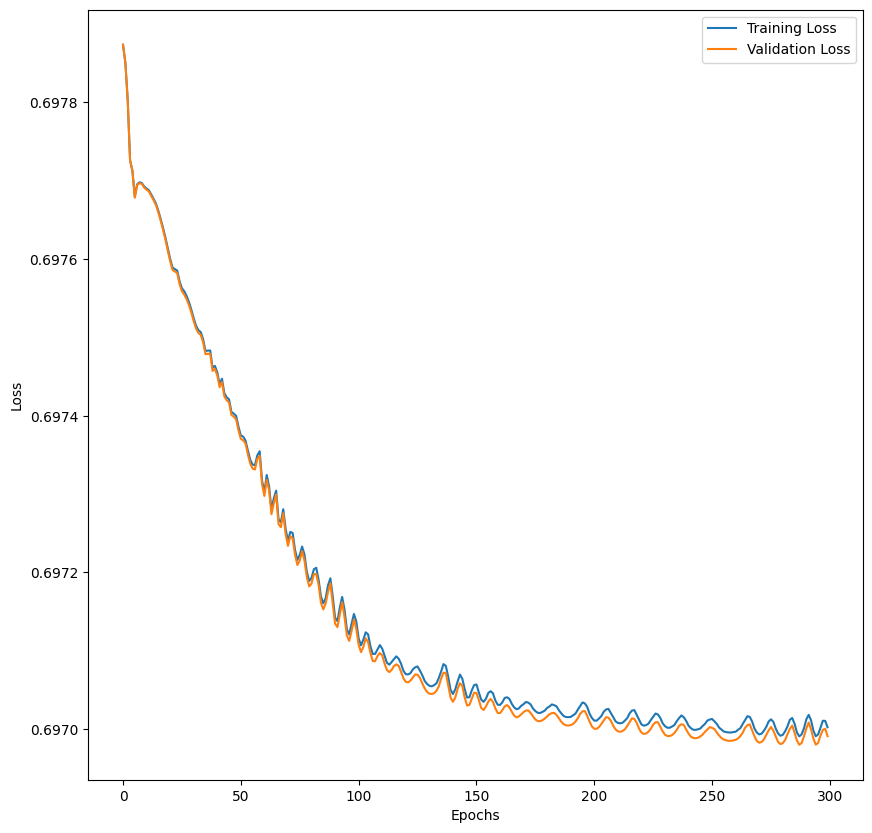

In [25]:
# plotting the train and validation loss

plot_train_val_loss(train_loss,val_loss)

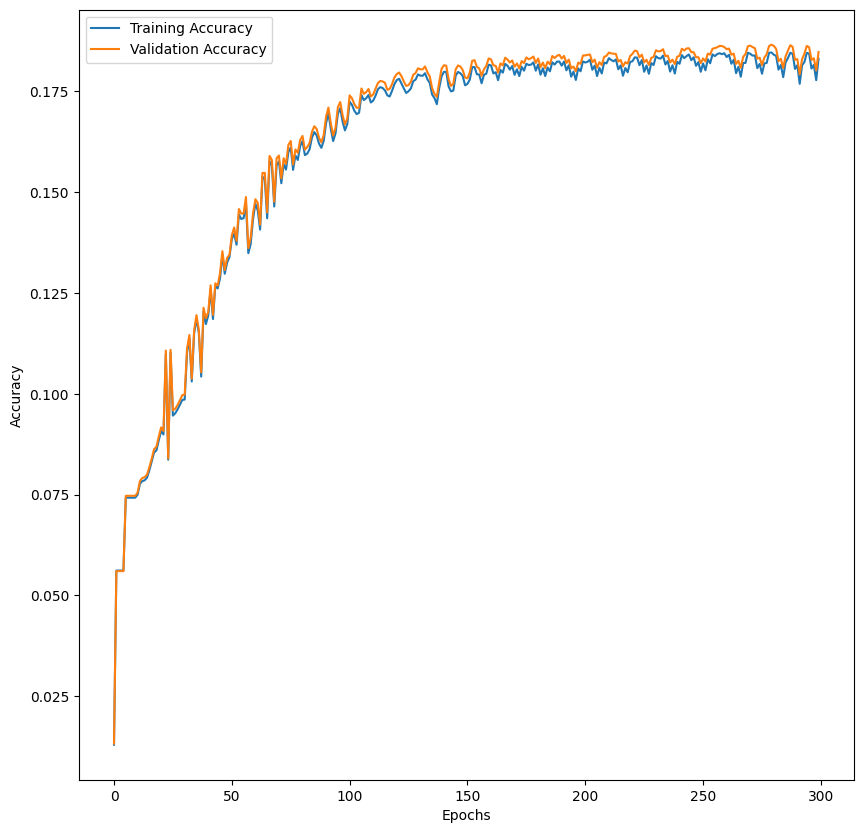

In [29]:
plot_train_val_accuracy(train_acc,val_acc)

In [30]:
# Finding the accuracy of the model

def accuracy(model,X_test_tensor,y_test_tensor):
    " This function returns the accuracy of the model"
    y_pred = model(X_test_tensor)
    y_pred = y_pred.detach().numpy()
    y_pred = np.argmax(y_pred,axis=1)
    y_test = y_test_tensor.detach().numpy()
    y_test = np.argmax(y_test,axis=1)
    return (y_pred==y_test).mean()


In [31]:
# Finding the accuracy of the model on train, validation and test

print('Train accuracy: ',accuracy(model,X_train_tensor,y_train_tensor))
print('Validation accuracy: ',accuracy(model,X_val_tensor,y_val_tensor))
print('Test accuracy: ',accuracy(model,X_test_tensor,y_test_tensor))

Train accuracy:  0.18352084995341805
Validation accuracy:  0.185488171816464
Test accuracy:  0.18427342098852406
